### Implementation of K-Fold Cross Validation on KNN regressor

In this question, it will be focused on the using k-fold cross-validation, which is an approach using for model selection on KNN regressor. The process will be proceed as the following (the initial step will be the similar as the previous question): 

In [1]:
#Import the library
library(reshape2) #For reshape the file
library(ggplot2) #For data visualisation

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
#Import the training and testing csv file
train <- read.csv('Task1A_train.csv')
test <- read.csv('Task1A_test.csv')

In [3]:
#Prepare the dataset by separate the actual result and the predictor
train_data = as.matrix(train[,-2]) 
train_label = as.matrix(train[,2])
test_data = as.matrix(test[,-2])
test_label = as.matrix(test[,2])

1.Implement	 a	 L-Fold	 Cross	 Validation	 (CV)	 function	 for	 your	 KNN
regressor:
cv(train.data,	train.label,	numFold=10)
which	takes	the	training	data	and	their	labels	(continuous	values),	the
number	of folds,	and	returns	errors	for	different	folds	of	the	training	data.

To implement the cross-validation technique, the knn classifier need to be created with same approach as the question one (create a knn regression which return the mean of point and k-value, and create a mse function) as the following:

In [4]:
#Derieved the KNN function from the tutorial activity 1
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knnCV <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    ## count number of train and test samples
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    test.label <- as.matrix(nrow(test.data))
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sample...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate mean
        test.label[i] <- mean(train.label[nn])
    }
    
    ## return the class labels as output
    return (test.label)
}

In [5]:
#Mean square error of the regression mean(y_real-y_pred)**2
mse <- function(a,b){
    mse = sum((a - b)^2/ nrow(b))
    return(mse)
}

Once all the necessary function is created, the cross-validation function will be created based on the following approach:

1. Dividing the dataset into k-equal size distinct subset
2. These subset will be divided into training set and validation set, which most of the set will be training set and 1 validation set (example 9 training set (k-1 set) and 1 validation set (1/k set))
3. The second process will be repeated based on number of k-fold to ensure that all the data points are used for both training set and validation set
4. The average of the validation error of each fold will be used for estimating testing error (Chen,2022)

This is how it is implemented:

In [6]:
# K-Fold Cross Validation Function
cv <- function(train.data,train.label,KF=3,numFold=10){
    #Create dataframe for storing k-fold and test accuracy
    cross.test <- data.frame('K'=rep(0,numFold),'test'=rep(0,numFold))
    #Iteration for creating K-1 training and a testing set
    for (k in 1:numFold){
        #index for the training set and validation set in k-fold cross validation(for dividing 
        #a dataset into training and validation set)
        index <- (((k-1)*nrow(train.data)/numFold)+1):((k*nrow(train.data))/numFold) #k-1 training set and 1/k validation set
        #Create a training set and validation per fold validation
        train.set <- as.matrix(train.data[-index,])
        train.lab <- as.matrix(train.label[-index,])
        test.set <- as.matrix(train.data[index,])
        test.lab <- as.matrix(train.label[index,])
        #Save value to the cross.test dataframe
        cross.test[k,'K'] <- k
        ### Apply KNN regressor and Store the error from the KNN regressor function to cross.test
        cross.test[k,'test'] <- mse(knnCV(train.set, train.lab, test.set, KF),test.lab)
    }
    #Return dataframe
    return(cross.test)
}

In [7]:
#Cross-validation 10 error from 10 fold
cv(train_data,train_label)

K,test
1,0.01710278
2,0.01652778
3,0.02490556
4,0.08063889
5,0.23397500
6,0.52177500
7,0.55035000
8,0.66915000
9,1.76782500
10,6.30945000


2. Using	 the	 training	 data in	 Question	 1,	 run	 your	 L-Fold	 CV	 where	the numFold	is	set	to	10.	Change the	value	of	K=1,..,20 in	your	KNN	regressor, and	for	each	K	compute	the	average	10	error	numbers	you	have got.Plot the average error	numbers	versus	1/K for	K=1,..,20 in	your	KNN	regressor.
Save the plot in your Jupyter Notebook file	for	Question 2.

In [8]:
#Calculate average of each k-fold when he k is change 1 to 20
knn_CV <- data.frame('K'=1:20, 'Testing'=rep(0,20))
for (k in 1:20){
    score=cv(train_data, train_label,KF=k)
    knn_CV[k,'Testing']=mean(score[,2])
}

#Calculate the average error for each k
knn_CV

K,Testing
1,0.586520
2,0.809465
3,1.019170
4,1.232728
5,1.511290
6,1.822983
7,2.216570
8,2.473662
9,2.895491
10,3.166623


### The plot of k-fold cross-validation knn error of 10 numbers

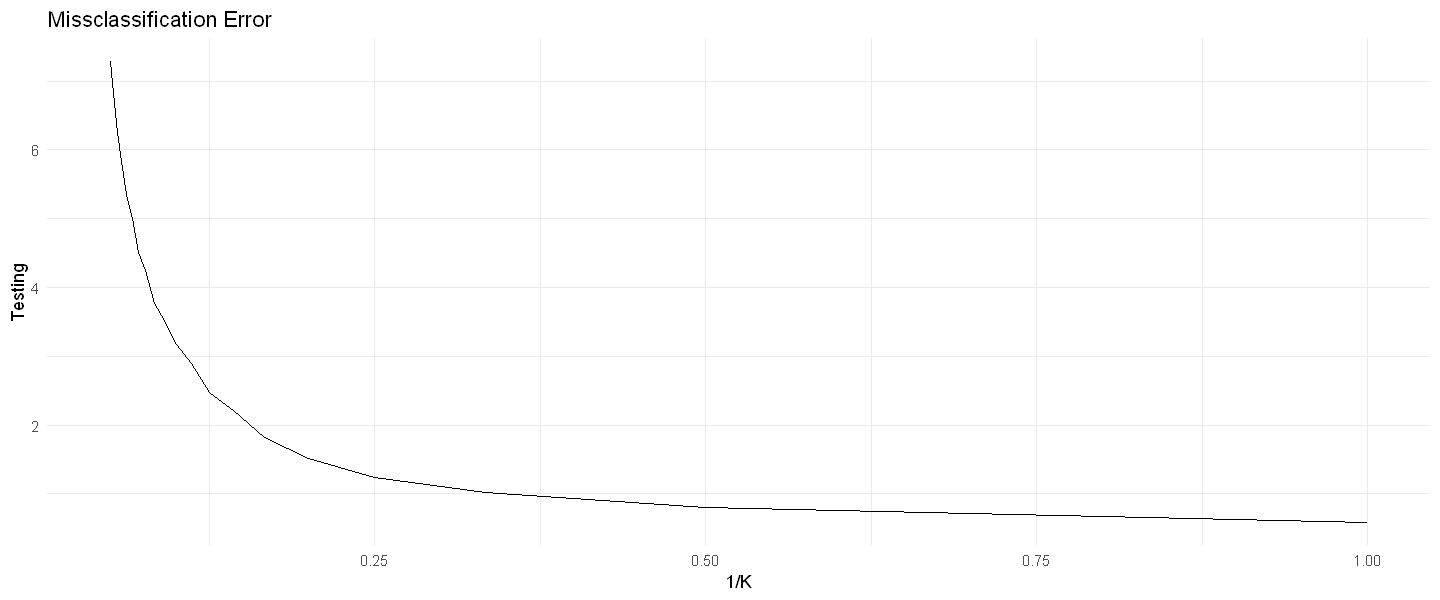

In [9]:
options(repr.plot.width=12, repr.plot.height=5) # area of display

ggplot(data=knn_CV, aes(x=1/K, y=Testing)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error")

Report	(in	your	Jupyter	Notebook	file)	the	optimum	value	for	K	based	on
your	plot	for	this	10-fold	cross	validation	in	the	previous	part	(Part	II).

In [10]:
#Find the optimal K value for 
Min_error<-min(knn_CV$Testing)
Optimal_K <- knn_CV[knn_CV$Testing == Min_error,"K"]
Optimal_K

[1] 1

Based on the optimal value and the plot, the optimal value of K for the k-fold cross validation of knn regressor is 1.

## Reference

All of the code and the algorithm idea is derieved from:

- Chen, B. (2022). $\textit{Week 1.:Elements of Machine Learning}$ \[PowerPoint slides]. https://lms.monash.edu/mod/resource/view.php?id=9894948 
- Jupyter Notebooks:FIT5201 Machine Learning, (nd.). $\textit{Activity 1.1 K-nearest neighbour classifier}$. https://lms.monash.edu/mod/resource/view.php?id=10048617